I will be working on the Titanic Dataset to predict the survival of passengers based on a number of real-life factors. The work has been derived with the help of existing Kaggle Notebooks (https://www.kaggle.com/harshkothari21/beginners-notebook-90-accuracy-with-eda, https://www.kaggle.com/kenjee/titanic-project-example) along with general resources.

In [55]:
# importing relevant Libraries for Machine Learning
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
# Loading Training & Test Datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Examining the Dataset
# .head() shows the first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets try to Understand the Data given

In [4]:
# Understand the nature of the data using .info() & .describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Tells us that Age and Cabin have a lot of null values!
# P.S. We can see the number of null values too if we are lazy to calculate
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

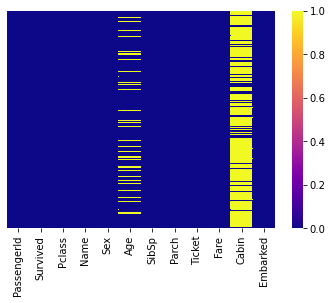

In [6]:
# We can also visualise the null values using heatmap
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
# yticklabels - plot columns , cmap - colour map
# We can see that Age and Cabin have a lot of null values.

In [7]:
# Lets see the numeric relevance of the training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# You can also see the features as a list
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

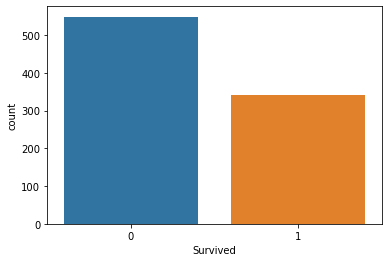

In [9]:
# Lets visualize the feature "Survived"
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

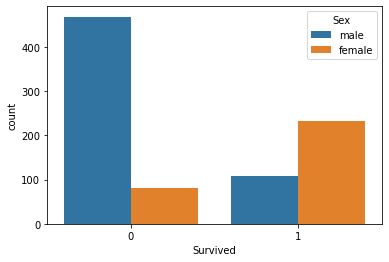

In [10]:
# Above figure shows that almost twice perished as much as survivors
# Lets visualize the sex distribution of the passengers
sns.countplot(x='Survived', hue='Sex', data=train)

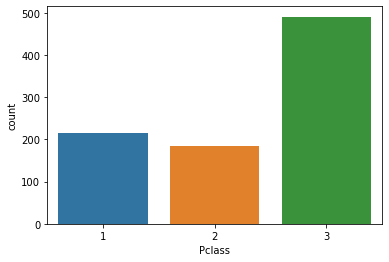

In [11]:
# Large number of males perished and a lot of females survived
# 'Sex' looks like a very strong explanatory variable, and it can be our choice for our single feature Logistic Regression model!
# Lets look at Pclass
sns.countplot(x='Pclass', data=train);

<AxesSubplot:xlabel='Survived', ylabel='count'>

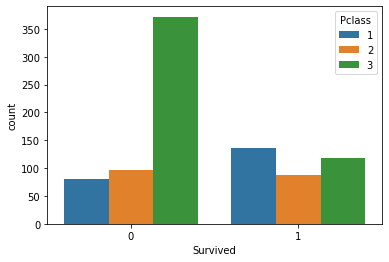

In [12]:
# implies that majority were 3rd class passengers
# Lets see if there is a strong relation of class with survivors
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:>

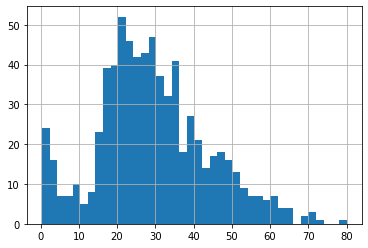

In [13]:
# We can see that majority of the people who died were from 3rd class.
# Pclass was a category, so we plotted a bar graph of their count
# For Age,since its numeric, we can have a histogram
train['Age'].hist(bins=40)

In [14]:
# Deducing from the histogram, majority of passengers were between 20 - 40 range , so youth
# Instead of visualization , we can also use value_counts(pandas), which gives number of unique values
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

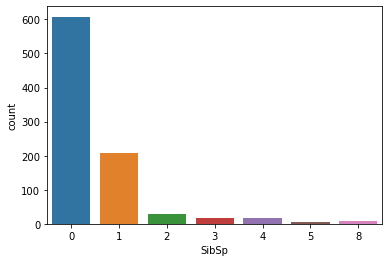

In [15]:
# or we can plot it
sns.countplot(x='SibSp', data=train)

Text(0.5, 1.0, 'Count plot for Parch')

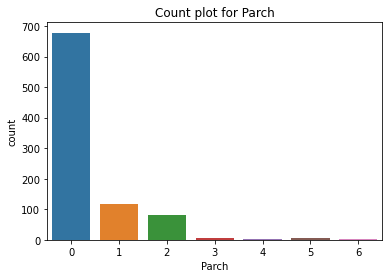

In [16]:
# Most passengers were travelling alone, and only 200 of them had a single sibling/spouse on the ship
# lets visualize number of parents, children on the ship
sns.countplot(x='Parch', data=train)
plt.title('Count plot for Parch')

In [17]:
# Again, not a lot were travelling with kids
# Everyone has tickets , so lets see 
train.Ticket.value_counts(dropna=False, sort=True)

347082       7
1601         7
CA. 2343     7
347088       6
CA 2144      6
            ..
250653       1
3101265      1
A/5 21173    1
237798       1
6563         1
Name: Ticket, Length: 681, dtype: int64

Text(0.5, 1.0, 'Fare Price distribution')

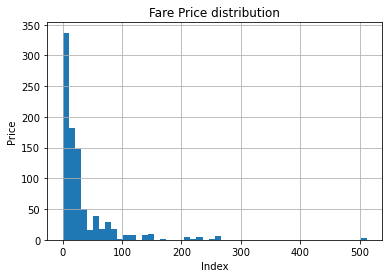

In [18]:
# This didn't give any relevant information ;(
# Moving on to Train Fare, the amount u paid
train['Fare'].hist(bins=50)
plt.ylabel('Price')
plt.xlabel('Index')
plt.title('Fare Price distribution')

In [19]:
# does cabin make a difference?
train.Cabin.value_counts(0)

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
              ..
B69            1
B71            1
E68            1
E38            1
A5             1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

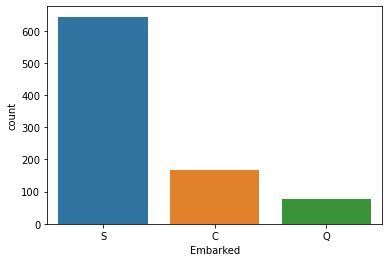

In [20]:
# not really
# Lets see the place of embarkment on the ship
sns.countplot(x='Embarked', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

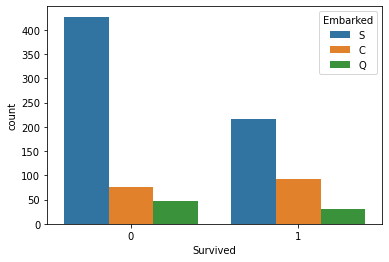

In [21]:
# is there a relation between place of embarkment and survivors?
sns.countplot(x='Survived', hue='Embarked', data=train)

<AxesSubplot:>

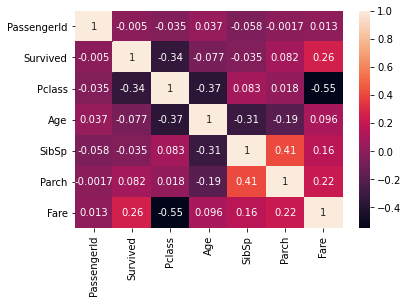

In [22]:
# doesnt seem like it.. maybe majority got in at the start, and therefore they are in majority
# Finding relations between variables like this will take a lot of time
# Best thing to do is to create a heat map!
sns.heatmap(train.corr(), annot=True)
# this gives a coloured + numeric relation between different features!!

In [23]:
# As you can see that Survived as max relation with Pclass
# Also Pclass and Age have maximum correlation in the heatmap
# I know its a negative correlation, that means they are good features taken inversely, so only see absolute values
# and not the sign
# We also verified these relations in one-on-one graphs above! So, we are on the right track.

In [24]:
# However, if we go above, we see that Age feature is missing for a lot of people
# So, what should be our next step?
# To fill up the data, we will replace missing values of age with the median age calculated PER CLASS!
# per class, cos its the most important feature for survivors

Fixing the Data!

In [25]:
age_group = train.groupby('Pclass')['Age']
age_group.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [26]:
age_group.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [27]:
# mean median are close, but median also has integer values, which is what we need for age.
# Now replace null ages with median age
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')

In [28]:
# Verify using isnull sum
train["Age"].isnull().sum()

0

In [29]:
# So all ages are now accounted for!
# Lets see our data again
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# We should now change sex to 0 and 1, and embarkments to 0,1,2 for easy use
# All of them were working before, now they aren't.
# train.Sex.replace('Male', '0')
# train.Sex.replace('Female', '1')

# train["Sex"].replace('male', '0')
# train["Sex"].replace('female', '1')


# train["Embarked"].replace('S', '0')
# train["Embarked"].replace('C', '1')
# train["Embarked"].replace('Q', '2')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# this works!
train.loc[train["Sex"] == "male","Sex"] = 0
train.loc[train["Sex"] == "female","Sex"] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train.loc[train["Embarked"] == "S","Embarked"] = 0
train.loc[train["Embarked"] == "C","Embarked"] = 1
train.loc[train["Embarked"] == "Q","Embarked"] = 2
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [38]:
# We have made the changes in the training set, but we also need to do the same in the test set. So, merge them!
df = pd.read_csv('train.csv')
test['Survived'] = np.nan # since they are not defined in the test set
full = pd.concat([df, test])

In [39]:
# Verify
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [40]:
# 418 means that of the test set, age is also those of the test set and cabin is from both test and training set
# there are 2 nulls in Embarked as well, and we dont want that.
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Remove null values / fill them with NA
full['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [43]:
# Convert 'Sex' variable to integer form!
full.loc[full["Sex"] == "male","Sex"] = 0
full.loc[full["Sex"] == "female","Sex"] = 1

# Convert 'Embarked' variable to integer form!
full.loc[full["Embarked"] == "S","Embarked"] = 0
full.loc[full["Embarked"] == "C","Embarked"] = 1
full.loc[full["Embarked"] == "Q","Embarked"] = 2

full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


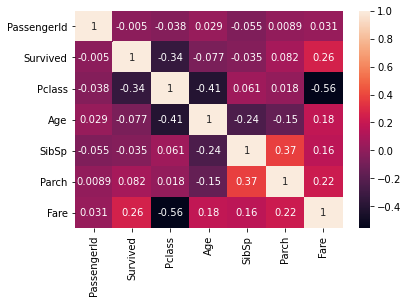

In [44]:
sns.heatmap(full.corr(), annot=True);

In [45]:
# In the above heatmap, the highest correlation for Age is with Pclass, so we can use Pclass to impute missing values!
# Also highest correlation is between Pclass and Fare
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

In [51]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [52]:
full['Fare']  = full.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [53]:
full['Cabin'] = full['Cabin'].fillna('U')

In [54]:
full['Cabin'].unique().tolist()[:20]

['U',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12']

In [56]:
full['Cabin'] = full['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [57]:
full['Cabin'].unique().tolist()

['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [58]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full['Cabin'] = full['Cabin'].map(cabin_category)

In [59]:
full['Cabin'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

In [60]:
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [61]:
full['Name'] = full.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [62]:
full['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [63]:
full['Name'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Major        0.152788
Mlle         0.152788
Ms           0.152788
Jonkheer     0.076394
Countess     0.076394
Capt         0.076394
Mme          0.076394
Lady         0.076394
Sir          0.076394
Don          0.076394
Dona         0.076394
Name: Name, dtype: float64

In [64]:
# Apart from Mr, Miss, Mrs, and Master, the rest have percentages close to zero...
# So, let's bundle them!
full.rename(columns={'Name' : 'Title'}, inplace=True)

In [65]:
full['Title'] = full['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [66]:
full['Title'].value_counts(normalize = True) * 100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
Other      2.597403
Name: Title, dtype: float64

In [67]:
# Better! let's convert to numeric
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}
full['Title'] = full['Title'].map(title_category)
full['Title'].unique().tolist()

[1, 3, 2, 4, 5]

In [68]:
# We also know from that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard 
# So , we can feature ENgineer the size of family!
full['familySize'] = full['SibSp'] + full['Parch'] + 1

In [69]:
# Lets remove the redundant features
full = full.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [70]:
full.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,familySize
0,1,0.0,3,1,0,22.0,7.2500,9,0.0,2
1,2,1.0,1,3,1,38.0,71.2833,3,1.0,2
2,3,1.0,3,2,1,26.0,7.9250,9,0.0,1
3,4,1.0,1,3,1,35.0,53.1000,3,0.0,2
4,5,0.0,3,1,0,35.0,8.0500,9,0.0,1


In [71]:
# Recover test dataset
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)

In [72]:
test.head()

,PassengerId,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,familySize
0,892,3,1,0,34.5,7.8292,9,2.0,1
1,893,3,3,1,47.0,7.0000,9,0.0,2
2,894,2,1,0,62.0,9.6875,9,2.0,1
3,895,3,1,0,27.0,8.6625,9,0.0,1
4,896,3,3,1,22.0,12.2875,9,0.0,3


In [73]:
# Recover train dataset
train = full[full['Survived'].notna()]

In [79]:
# https://stackoverflow.com/questions/45037907/python-astypestr-gives-settingwithcopywarning-and-requests-i-use-loc
# train = train.copy()
train['Survived'] = train['Survived'].astype(np.int8)

Finally , we are done with the dataset! Now we can work on the model.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

In [81]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(max_iter=10000)
LogisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [82]:
predictions = LogisticRegression.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int8)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[87, 13],
       [24, 55]])

In [84]:
acc = (87+54) / (87+54+13+25) * 100
acc

78.77094972067039

Cross validation using K-Folds

In [85]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2)

/home/aryan/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [86]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression, X_test, y_test, cv = kf).mean() * 100

77.63492063492063

HyperParametric Tuning

In [87]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=2)

In [88]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [90]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [91]:
randomForest_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300}

In [92]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 300)

randomForestFinalModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=2)

In [93]:
predictions = randomForestFinalModel.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions) * 100

80.44692737430168

In [96]:
# 80 percent is a good enough accuracy :)) Ill try to make it better, tho!